<h2>Interfacing R from Python in Jupyter Notebook</h2>

<a href="https://www.linkedin.com/pulse/interfacing-r-from-python-3-jupyter-notebook-jared-stufft/">SRC: https://www.linkedin.com/pulse/interfacing-r-from-python-3-jupyter-notebook-jared-stufft/</a>

<p>After installing rpy2 via pip, the following should be launced at the top of every crossover notebook.  rpy2 allows for the variables to cross over between kernels.  I'll demonstrate usage.</p>

In [3]:
import rpy2.rinterface
%load_ext rpy2.ipython

#Commonly used libraries for DS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\james\Python\Python39\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


<h4>Magic Commands</h4>
<p>%load_ext rpy2.ipython above only needs to be run once per notebook.  This opens up the interface between the kernels.

%%R at the start of a code block indicates that it should be interpreted by the R kernel instead of the Python kernel.  See example below.</p>

In [17]:
%%R
x <- iris$Sepal.Length
print(x)

  [1] 5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 [19] 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 [37] 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 [55] 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 [73] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 [91] 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
[109] 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
[127] 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
[145] 6.7 6.7 6.3 6.5 6.2 5.9


<p>When running the above code, one thing that you might have noticed is that it runs slower than running on the native R kernel.  It might just be the passback for the print.  I wouldn't normally print an entire array of data, so it might be moot.

This is great for using R, but what if I want to pass this variable to Python?

<h4>Options and Dedicated Commands</h4>
One option is to use dedicated commands <b>%Rget</b> and <b>%Rpush</b> are available, but you can also use <b>-i</b> (for input) and <b>-o</b> (for output) as options on the <b>%%R</b> magic command.  I'll demonstrate below the options method for passing an R object to Python.
</p>

In [18]:
%%R -o x
x = iris$Sepal.Length

And now `x` has been passed as a Python variable and can be used accordingly.  In the example below, I demonstrate how to pass the value of this variable as markdown output.  Note, to get it to display correctly, you need to click `</>` and select `text/markdown` (built-in) to have it display properly.

In [19]:
#%%

# general pattern for displaying variable data as markdown

from IPython.display import display, Markdown

display(Markdown('The value of my variable `x` is: {} units.'.format(str(x))))

The value of my variable `x` is: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9] units.

Data can also go from Python to R.  In the following example, a pandas dataframe is created in Python and then plotted using R.

In [5]:
python_df = pd.DataFrame({'A':[1,2,3,4,5,6],'B':[1,4,9,16,25,36]})
print(python_df)

   A   B
0  1   1
1  2   4
2  3   9
3  4  16
4  5  25
5  6  36


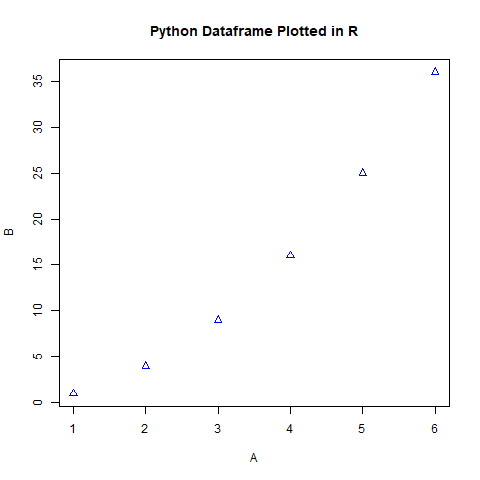

In [9]:
%%R -i python_df

# -i input option brings the python dataframe into R

plot(python_df,main='Python Dataframe Plotted in R',col='blue',pch=2)

Finally, another example of sending data from R to Python.  Note that python_df is already known by R from previous code block, so we do not have to send it again.  Then we'll use some Python to see what is in these objects that were sent from R to Python.

In [10]:
%%R -o model -o coef
# R to Python
# the python_df variable is still in R
# We can output the model object we create using -o option

# Creating a linear model on the Python DF using R's lm() function
model <- lm(B~A, data=python_df)
coef <- model$coefficients

In [11]:
# Show the model output as in R
print(model)
print(type(model))
print('----------------------------')

# Model coeffficients
print(coef)
print(type(coef))
print('----------------------------')

# The rpy2 objects can be turned into more native Python data structures
coef_list = list(coef)
print(coef_list)
print(type(coef_list))


Call:
lm(formula = B ~ A, data = python_df)

Coefficients:
(Intercept)            A  
     -9.333        7.000  


<class 'rpy2.robjects.vectors.ListVector'>
----------------------------
[-9.33333333  7.        ]
<class 'numpy.ndarray'>
----------------------------
[-9.333333333333345, 7.000000000000002]
<class 'list'>
